In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

In [ ]:
df_train = pd.read_csv('Train.csv')
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df_train.shape

(8523, 12)

In [ ]:
df_train.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


Replacing Null Values

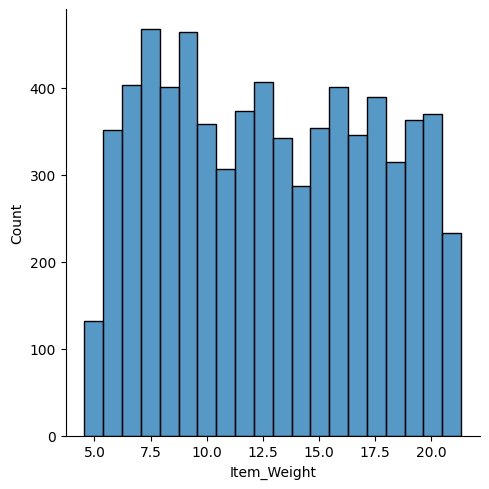

In [ ]:
sns.displot(df_train.Item_Weight)

In [ ]:
Item_Weight_min = df_train.Item_Weight.min(skipna=True)
Item_Weight_min

4.555

In [ ]:
Item_Weight_max = df_train.Item_Weight.max(skipna=True)
Item_Weight_max

21.35

In [ ]:
Weight_na_rows = df_train.Item_Weight.isna()
random_values = np.random.uniform(Item_Weight_min, Item_Weight_max, size=1463) #1463 is the number of null values in the column
df_train.loc[Weight_na_rows, 'Item_Weight'] = random_values
df_train.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


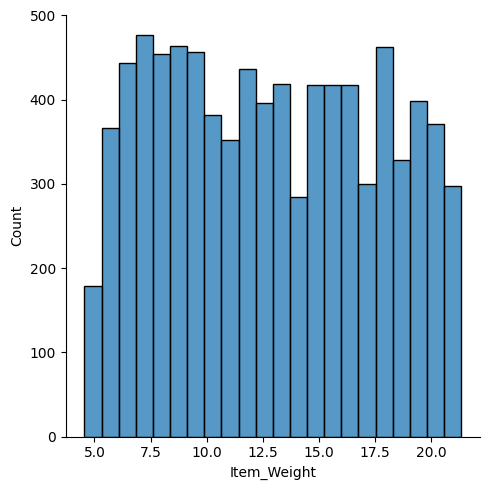

In [ ]:
sns.displot(df_train.Item_Weight)

For rows that had null values in the Item_Weight column, they now have weights that are now evenly distributed across the Item_weight distribution

Now I will do the same with the Outlet_Size column

In [ ]:
df_train.Outlet_Size.value_counts()

,count
Outlet_Size,
Medium,2793
Small,2388
High,932


In [ ]:
df_train.Outlet_Location_Type.value_counts()
# I was hoping that the outlet location type would help me replace the null values of Outlet_Size ... no dice

,count
Outlet_Location_Type,
Tier 3,3350
Tier 2,2785
Tier 1,2388


<Axes: xlabel='Outlet_Size', ylabel='count'>

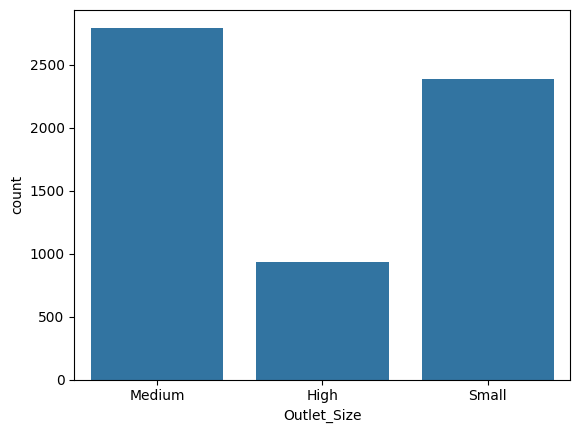

In [ ]:
sns.countplot(x=df_train.Outlet_Size)

In [ ]:
value_dist = df_train.Outlet_Size.value_counts(normalize=True)

In [ ]:
Outlet_Size_na_rows = df_train.Outlet_Size.isna()
num_size_na_rows = Outlet_Size_na_rows.sum()
distributed_values = np.random.choice(value_dist.index, size=num_size_na_rows, p=value_dist.values)
df_train.loc[Outlet_Size_na_rows, 'Outlet_Size'] = distributed_values

<Axes: xlabel='Outlet_Size', ylabel='count'>

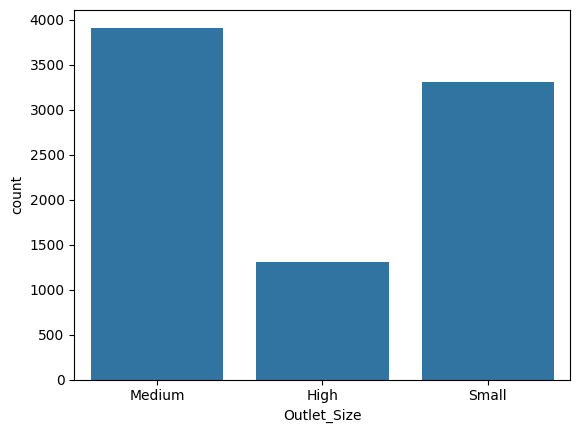

In [ ]:
sns.countplot(x=df_train.Outlet_Size)

In [ ]:
df_train.isna().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [ ]:
df_train.Item_Fat_Content.value_counts()
#Will need to replace some of these

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [ ]:
df_train.replace({'Item_Fat_Content': {'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [ ]:
df_train.Item_Fat_Content.value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


Now some of the data cleaning is done, now it is time for the machine learning portion

In [ ]:
encoder = LabelEncoder()

In [ ]:
df_train.Item_Identifier = encoder.fit_transform(df_train['Item_Identifier'])

df_train.Item_Fat_Content = encoder.fit_transform(df_train['Item_Fat_Content'])

df_train.Item_Type = encoder.fit_transform(df_train['Item_Type'])

df_train.Outlet_Identifier = encoder.fit_transform(df_train['Outlet_Identifier'])

df_train.Outlet_Size = encoder.fit_transform(df_train['Outlet_Size'])

df_train.Outlet_Location_Type = encoder.fit_transform(df_train['Outlet_Location_Type'])

df_train.Outlet_Type = encoder.fit_transform(df_train['Outlet_Type'])

In [ ]:
df_train.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228


In [ ]:
X = df_train.drop(columns='Item_Outlet_Sales', axis=1)
Y = df_train['Item_Outlet_Sales']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=2)

XGBoost Model Test

In [ ]:
regressor = XGBRegressor()

In [ ]:
regressor.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)

In [ ]:
# R squared Value
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [ ]:
print('R Squared value =', r2_train)

R Squared value = 0.8895030288660489


In [ ]:
test_data_prediction = regressor.predict(X_test)

In [ ]:
r2_xgboost_test = metrics.r2_score(Y_test, test_data_prediction)

In [ ]:
print('R Squared value =', r2_xgboost_test)

R Squared value = 0.5181898088596653


Linear Model Test

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
test_data_prediction = regressor.predict(X_test)
r2_linear_test = metrics.r2_score(Y_test, test_data_prediction)
print('R Squared value =', r2_linear_test)

R Squared value = 0.48984966026135657


Random Forest Model Test

In [ ]:
model3 = RandomForestRegressor(random_state = 2)
model3.fit(X_train,Y_train)
test_data_prediction = model3.predict(X_test)
r2_RFM_test = metrics.r2_score(Y_test, test_data_prediction)
print('R Squared value =', r2_RFM_test)

R Squared value = 0.5518272697634796


Decision Tree Model Test

In [ ]:
model4 = DecisionTreeRegressor(random_state= 2)
model4.fit(X_train,Y_train)
test_data_prediction = model4.predict(X_test)
r2_DTM_test = metrics.r2_score(Y_test, test_data_prediction)
print('R Squared value =', r2_DTM_test)

R Squared value = 0.19082971222434786


K Nearest Neightbors Model Test

In [ ]:
model5 = KNeighborsRegressor(n_neighbors=30) #30 yielded the greatest R Squared value after some quick testing
model5.fit(X_train,Y_train)
test_data_prediction = model5.predict(X_test)
r2_KNN_test = metrics.r2_score(Y_test, test_data_prediction)
print('R Squared value =', r2_KNN_test)

R Squared value = 0.27252858265858204


Lets Visualize the different R Squared Value

<Axes: >

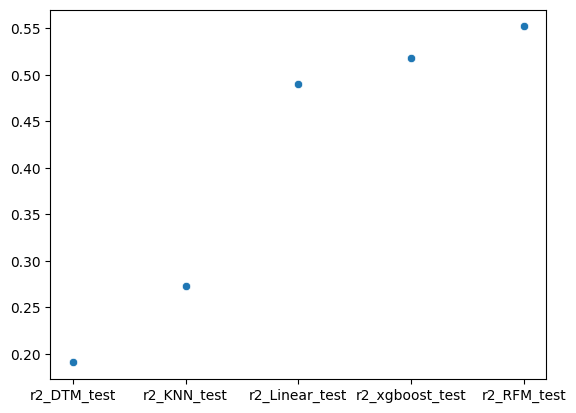

In [ ]:
model = ["r2_DTM_test", "r2_KNN_test", "r2_Linear_test", "r2_xgboost_test", "r2_RFM_test"]
model_value = [r2_DTM_test, r2_KNN_test, r2_linear_test, r2_xgboost_test, r2_RFM_test]
sns.scatterplot(x = model, y = model_value)